**Route Analysis:**

Features: Route, Sectors_Scheduled
Research Questions:
What are the most popular routes based on the number of scheduled sectors?
How does the distribution of scheduled sectors vary across different routes and airlines?

**Operational Efficiency:**

Features: Airline, Departures_On_Time, Arrivals_On_Time, Cancellations
Research Questions:
Do certain airlines consistently achieve higher rates of on-time departures and arrivals?
What factors contribute to variations in cancellation rates across airlines?

**Delay Analysis:**

Features: Airline, Departures_Delayed, Arrivals_Delayed
Research Questions:
What are the main factors contributing to delays in departures and arrivals?
Are there specific airlines or routes that experience more delays than others?

**Trend Analysis:**

Features: Month, Year, Sectors_Scheduled, Sectors_Flown, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
How have the number of scheduled sectors and sectors flown changed over the years?
Are there any noticeable trends or patterns in cancellations, delays, and on-time performance over time?

**Comparative Analysis:**

Features: Route, Airline, Departures_On_Time, Arrivals_On_Time, Cancellations
Research Questions:
How does the on-time performance of different airlines compare across similar routes?
Are there significant differences in cancellation rates between low-cost and full-service carriers?

**Impact of Month/Season:**

Features: Month, Sectors_Scheduled, Sectors_Flown, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
How does air travel demand vary by month, and how does this impact operational metrics?
Are there specific months or seasons associated with higher rates of cancellations or delays?

**Predictive Modeling:**

Features: Route, Airline, Month, Sectors_Scheduled, Departures_On_Time, Arrivals_On_Time, Cancellations, Departures_Delayed, Arrivals_Delayed
Research Questions:
Can we predict the likelihood of delays or cancellations based on historical data and other factors such as airline, route, and month?
What features are the most influential predictors of on-time performance or operational disruptions?
These specific feature requirements can help in structuring your analysis and formulating research questions that address various aspects of airline operations and performance.






In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("otp_time_series_web.csv")# adding column name to the DF
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155.0,0.0,123.0,120.0,32.0,35.0,2004.0,1.0
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75.0,0.0,72.0,72.0,3.0,3.0,2004.0,1.0
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40.0,0.0,36.0,35.0,4.0,5.0,2004.0,1.0
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548.0,2.0,478.0,487.0,70.0,61.0,2004.0,1.0
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191.0,0.0,169.0,168.0,22.0,23.0,2004.0,1.0


In [6]:
df.describe()

,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
count,61755.000000,61755.000000,61439.000000,61755.000000,61755.000000,61750.000000,61755.000000,61755.000000,61755.000000
mean,366.451348,361.140005,5.339621,303.410037,298.627512,57.735500,62.510842,2010.509513,6.409602
std,2327.617807,2294.375969,37.313022,1932.458620,1900.042975,376.593749,411.120159,3.626119,3.419618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,1.000000
25%,40.000000,40.000000,0.000000,33.000000,32.000000,6.000000,6.000000,2008.000000,3.000000
50%,94.000000,93.000000,0.000000,79.000000,78.000000,14.000000,14.000000,2011.000000,6.000000
75%,193.000000,190.000000,2.000000,159.000000,156.000000,31.000000,33.000000,2014.000000,9.000000
max,50949.000000,49908.000000,2262.000000,43537.000000,43291.000000,11750.000000,12840.000000,2016.000000,12.000000


In [7]:
df.nunique()

Route                  145
Departing_Port          45
Arriving_Port           46
Airline                 13
Month                  153
Sectors_Scheduled     2487
Sectors_Flown         2441
Cancellations          398
Departures_On_Time    2297
Arrivals_On_Time      2297
Departures_Delayed    1253
Arrivals_Delayed      1299
Year                    13
Month_Num               12
dtype: int64

***DATA CLEANING***

In [8]:
df.isnull().sum()

Route                   0
Departing_Port          0
Arriving_Port           0
Airline                 1
Month                   1
Sectors_Scheduled       1
Sectors_Flown           1
Cancellations         317
Departures_On_Time      1
Arrivals_On_Time        1
Departures_Delayed      6
Arrivals_Delayed        1
Year                    1
Month_Num               1
dtype: int64

In [9]:
df.dropna( inplace= True)

In [10]:
df.isnull().sum()


Route                 0
Departing_Port        0
Arriving_Port         0
Airline               0
Month                 0
Sectors_Scheduled     0
Sectors_Flown         0
Cancellations         0
Departures_On_Time    0
Arrivals_On_Time      0
Departures_Delayed    0
Arrivals_Delayed      0
Year                  0
Month_Num             0
dtype: int64

In [11]:
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155.0,0.0,123.0,120.0,32.0,35.0,2004.0,1.0
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75.0,0.0,72.0,72.0,3.0,3.0,2004.0,1.0
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40.0,0.0,36.0,35.0,4.0,5.0,2004.0,1.0
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548.0,2.0,478.0,487.0,70.0,61.0,2004.0,1.0
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191.0,0.0,169.0,168.0,22.0,23.0,2004.0,1.0


In [12]:
df_1 = df.sample(frac=0.25, random_state=42)

# Print the shape of the original and reduced data to confirm the reduction
print("Original Data Shape:", df.shape)
print("Reduced Data Shape:", df_1.shape)

df_1.head()

Original Data Shape: (61434, 14)
Reduced Data Shape: (15358, 14)


,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
46916,Brisbane-Sydney,Brisbane,Sydney,Jetstar,Apr-14,180.0,171.0,9.0,141.0,147.0,30.0,24.0,2014.0,4.0
3753,Kalgoorlie-Perth,Kalgoorlie,Perth,Skywest,Jan-05,44.0,43.0,1.0,42.0,42.0,1.0,1.0,2005.0,1.0
51122,Sydney-Adelaide,Sydney,Adelaide,QantasLink,Dec-14,24.0,24.0,0.0,14.0,12.0,10.0,12.0,2014.0,12.0
14902,Darwin-Brisbane,Darwin,Brisbane,Qantas,Nov-07,30.0,30.0,0.0,20.0,26.0,10.0,4.0,2007.0,11.0
33861,Melbourne-Brisbane,Melbourne,Brisbane,Virgin Australia,Nov-11,353.0,350.0,3.0,304.0,304.0,46.0,46.0,2011.0,11.0


In [22]:
filtered=df_1[df_1['Airline']!='All Airlines']

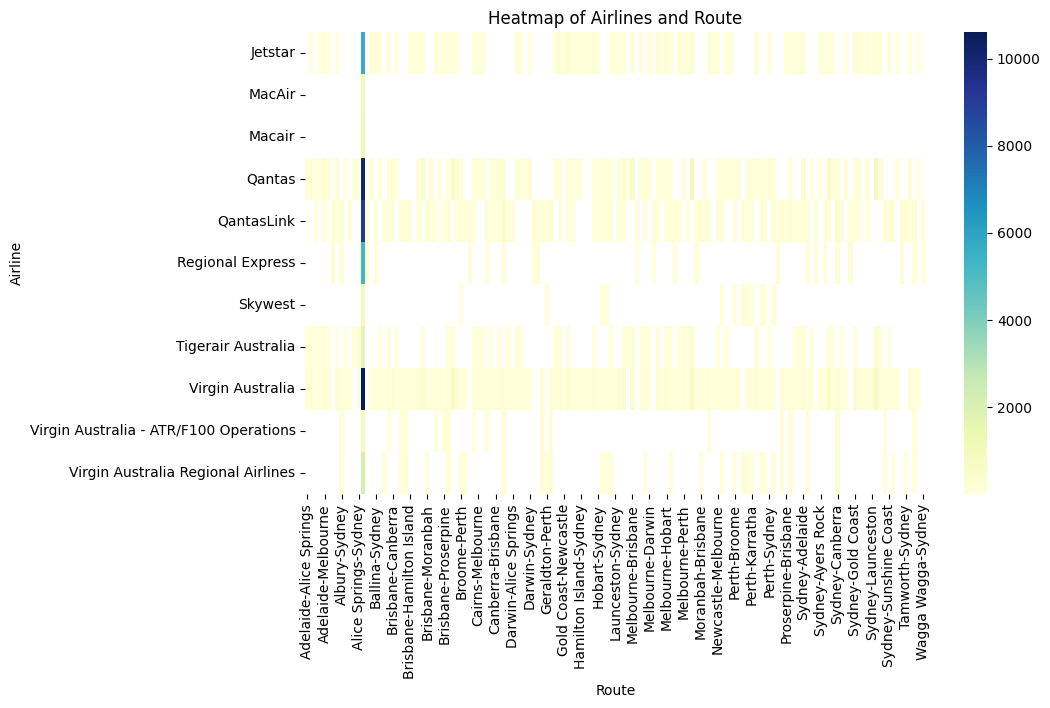

In [14]:
# prompt: Make me heatmap for Airlines and route

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the Airlines and Route columns
plt.figure(figsize=(10, 6))
sns.heatmap(filtered.pivot_table(index='Airline', columns='Route', values='Sectors_Scheduled', aggfunc='mean'), cmap='YlGnBu')
plt.title('Heatmap of Airlines and Route')
plt.xlabel('Route')
plt.ylabel('Airline')
plt.show()


<Figure size 1000x1000 with 0 Axes>

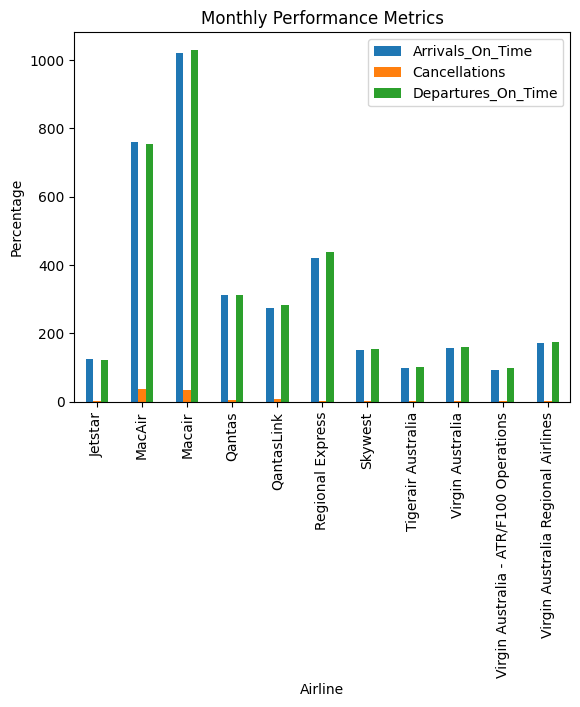

In [33]:
import matplotlib.pyplot as plt

# Assuming df_1 is your DataFrame containing the necessary columns
plt.figure(figsize=(10, 10))
filtered.groupby('Airline')[['Arrivals_On_Time', 'Cancellations', 'Departures_On_Time']].mean().plot(kind='bar')
plt.title('Monthly Performance Metrics')
plt.ylabel('Percentage')
plt.show()


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

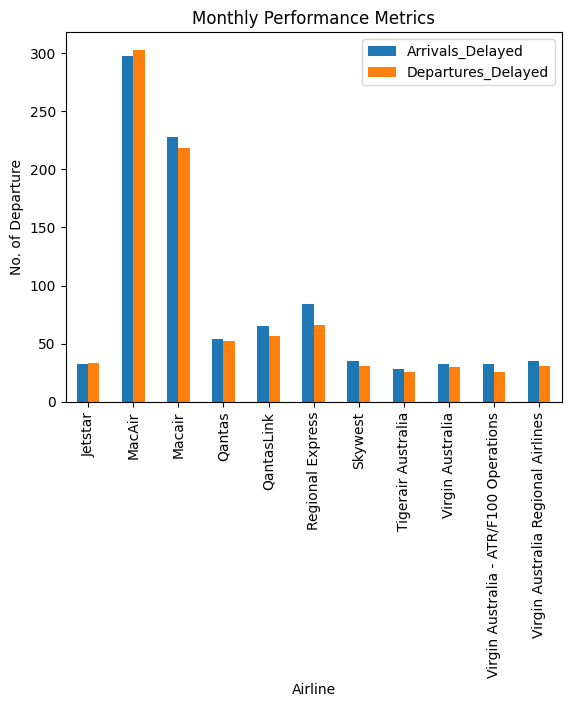

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))
filtered.groupby('Airline')[['Arrivals_Delayed', 'Departures_Delayed']].mean().plot(kind='bar')
plt.title('Monthly Performance Metrics')
plt.ylabel('No. of Departure')
plt.show()


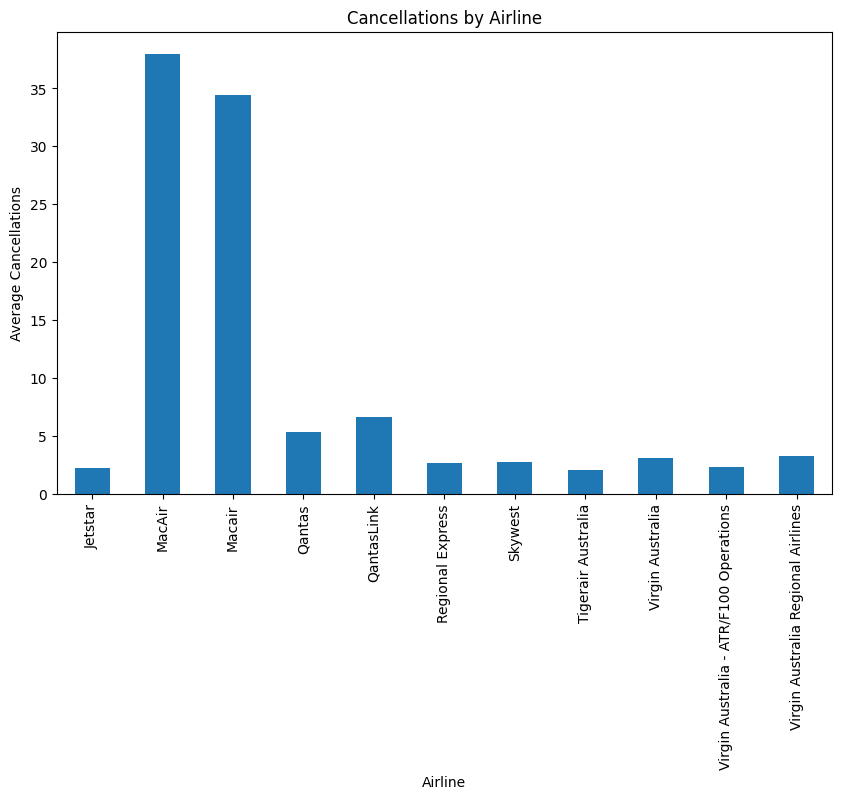

In [31]:
import matplotlib.pyplot as plt
# Create a bar plot for Cancellations by Airline
plt.figure(figsize=(10, 6))
filtered.groupby('Airline')['Cancellations'].mean().plot(kind='bar')
plt.title('Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Cancellations')
plt.xticks(rotation = "vertical")
plt.show()


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Load the dataset
data = filtered

# Select features and target variable
X = data[['Departing_Port', 'Arriving_Port', 'Airline', 'Month_Num']]  # Features
y = data['Departures_Delayed']  # Target variable
y_train_binary = (y_train > 0).astype(int)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train_binary)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)
y_test_binary = (y_test > 0).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy*100)

f1 = f1_score(y_test_binary, y_pred)
print("F1 Score:", f1*100)


Accuracy: 96.01240584847143
F1 Score: 97.96010879419764


In [38]:
# prompt: give me a Logistic Regression model for F score and accuracy

import pandas as pd
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = filtered

# Select features and target variable
X = data[['Departing_Port', 'Arriving_Port', 'Airline', 'Month_Num']]  # Features
y = data['Departures_Delayed']  # Target variable
y_train_binary = (y_train > 0).astype(int)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train, y_train_binary)

# Make predictions on the testing set
y_pred = lr_classifier.predict(X_test)
y_test_binary = (y_test > 0).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy*100)

f1 = f1_score(y_test_binary, y_pred)
print("F1 Score:", f1*100)


Accuracy: 96.45547186530793
F1 Score: 98.19576003608479


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming 'data' is your DataFrame containing the necessary columns
# Identify categorical variables
categorical_cols = ['Departing_Port', 'Arriving_Port', 'Airline']

# Convert categorical variables into one-hot encoding
# Convert categorical variables into numerical format using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Initialize KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters

# Fit the model on the preprocessed data
kmeans.fit(data)

# Obtain cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate silhouette score to evaluate clustering performance
silhouette_score_value = silhouette_score(data_encoded, cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)

# Calculate Davies-Bouldin score to evaluate clustering performance
davies_bouldin_score_value = davies_bouldin_score(data_encoded, cluster_labels)

# Print the Davies-Bouldin score
print("Davies-Bouldin Score:", davies_bouldin_score_value)

# Calculate Calinski-Harabasz score to evaluate clustering performance
calinski_harabasz_score_value = calinski_harabasz_score(data_encoded, cluster_labels)

# Print the Calinski-Harabasz score
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)


<ipython-input-43-d13194eb91c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-43-d13194eb91c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-43-d13194eb91c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

ValueError: could not convert string to float: 'Brisbane-Sydney'